# Build a decision tree for a regression

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [2]:
X = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
y = pd.DataFrame(data=dataset['target'],columns=['progression'])
y.head()

,progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


The dependent variables looks like this:

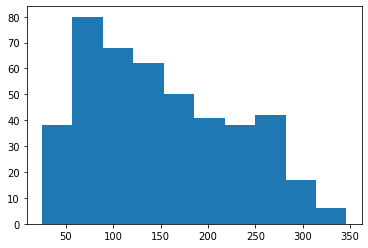

In [4]:
import matplotlib.pyplot as plt

plt.hist(y.values)
plt.show()

All independent variables are already numeric and transformed (standardised), so we can easily progress to the modelling stage.

## Building the tree

In [5]:
def create_decision_tree_regression(X_train, y_train):
    
    # Import the necessary library
    from sklearn.tree import DecisionTreeRegressor
    # Create a regressor instance and fit
    decision_tree = DecisionTreeRegressor(max_depth=3)
    decision_tree.fit(X_train,y_train)
    
    return decision_tree

This time we obtain a metric that can be used for regression, the root mean squared error. We can also change the parameters:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = create_decision_tree_regression(X_train, y_train)

prediction = tree.predict(X_test)

print('RMSE:', np.sqrt(mse(y_test,prediction)))
print('Number of nodes:', tree.tree_.node_count)

RMSE: 59.092283270712144
Number of nodes: 15


## Visualising the tree

We can also visualise our tree by using the following code:

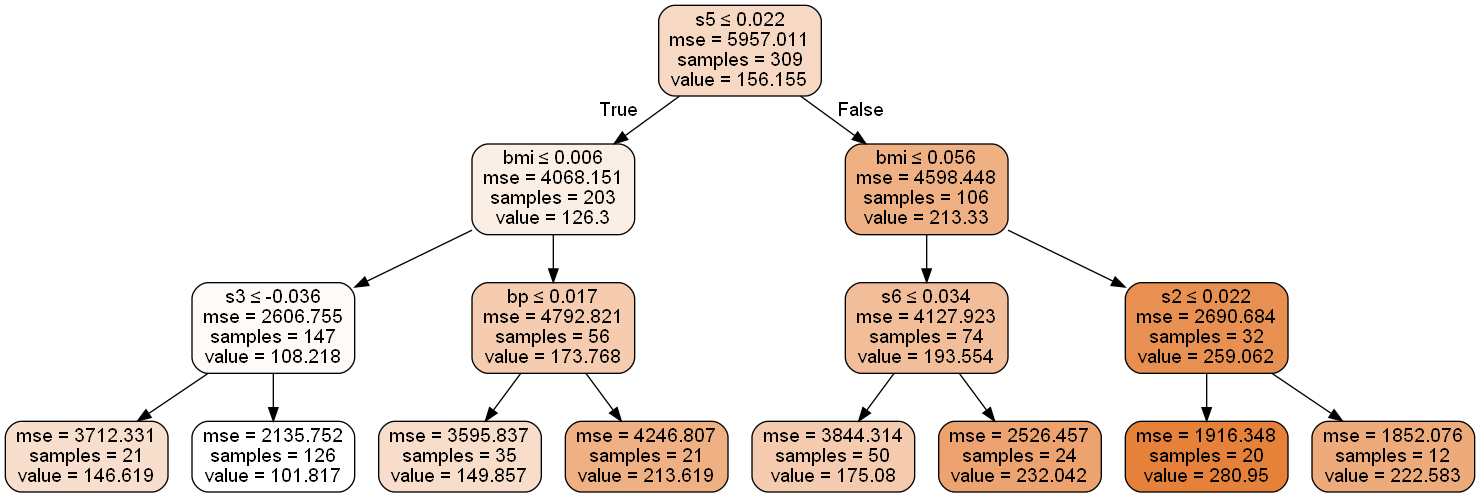

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

# create a file to store the figure in
dot_data = StringIO()


export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns)

# import and display the figure
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The value entry gives us the average of the dependent variable over all the samples in the leaf node.